<div>
    <img src="https://media.datakeen.co/wp-content/uploads/2022/11/28141154/Datakeen-Classification-texte.png" alt="Nobel Prize" width="250" align="left" hspace="10">
    <h1>Digikala Comments Classification</h1>
</div>


Objective: Develop a model to classify Digikala user comments by intent (e.g., product quality, pricin).

Approach: Use machine learning for multi-class classification, focusing on precision.

In [42]:
#!pip install hazm
# !pip install tensorflow-gpu==2.0.0
# !pip install tensorflow

## Import necessary libraries

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot
from hazm import *

import warnings
warnings.filterwarnings('ignore')


## Read Data

In [44]:
df = pd.read_csv('data_train.csv', encoding="utf-8")

## Overview data

In [45]:
df.head(3)

,id,comment,intent
0,14311999,خوب وخوش طعم بود,"1,5"
1,14312094,واقعا دست مریزاد هراز جان هم زده پروبیوتیک و خ...,"1,5"
2,14312102,هنوز استفاده نکردم ولی عطر خوبی داره بسته بندی...,"1,5"


In [46]:
df.tail(3)

,id,comment,intent
89997,15336949,خوب و معمولی است.,1
89998,15336950,بد نیست,1
89999,15336955,نسبتا خوب,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       90000 non-null  int64 
 1   comment  90000 non-null  object
 2   intent   90000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


In [48]:
df.isna().sum()

id         0
comment    0
intent     0
dtype: int64

In [49]:
df.duplicated().sum()

1

In [50]:
df[df.duplicated]

,id,comment,intent
49189,14000000,بوی خوب و غلظت مناسب,5


In [51]:
df[df.id == 14000000]

,id,comment,intent
44545,14000000,بوی خوب و غلظت مناسب,5
49189,14000000,بوی خوب و غلظت مناسب,5


In [52]:
df = df.drop_duplicates(ignore_index=True).reset_index(drop=True)

## EDA

<Axes: xlabel='intent'>

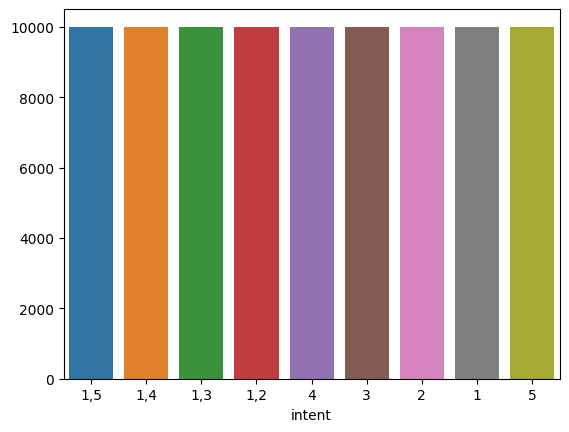

In [53]:
sns.barplot(x=df['intent'].value_counts().index, y=df['intent'].value_counts().values)

In [54]:
df['intent'].value_counts()

intent
1,5    10000
1,4    10000
1,3    10000
1,2    10000
4      10000
3      10000
2      10000
1      10000
5       9999
Name: count, dtype: int64

## Text preprocessing

In [55]:
import re
normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
# turn a doc into clean tokens
def clean_data(doc):
    doc = normalizer.normalize(doc) # Normalize document using Hazm Normalizer
    tokenized = word_tokenize(doc)  # Tokenize text
    # ['یه', 'ساله', 'خریدم', 'خیلی', 'ضعیف', 'است', 'بازی', 'هم', 'که', 'چی', 'بگم', 'هیچ', 'کدوم', 'رو', 'باز', 'نمیکنه']
    tokens = []
    for token in tokenized:
      token = re.sub("[،:.,;()/+]", " ", token) 
      token = re.sub(r"\!+","!", token)
      token = re.sub(r"\؟+","؟", token)
      token = re.sub(r"\u200c", " ", token)
      tokens.append(token)

    tokens = [w for w in tokens if not len(w) <= 1] # single character removal 
    tokens = [w for w in tokens if not w.isdigit()] # digit remove
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # Lemmatize sentence words using Hazm Lemmatizer
    tokens = [stemmer.stem(w) for w in tokens] 
    tokens = ' '.join(tokens)
    return tokens

In [56]:
df["clean_comment"] = df["comment"].apply(clean_data)

In [57]:
df.head()

,id,comment,intent,clean_comment
0,14311999,خوب وخوش طعم بود,"1,5",خوب وخو طع بود#اس
1,14312094,واقعا دست مریزاد هراز جان هم زده پروبیوتیک و خ...,"1,5",واقعا دست مریزاد هراز ج ه زده پروبیوتیک خوشمزه...
2,14312102,هنوز استفاده نکردم ولی عطر خوبی داره بسته بندی...,"1,5",هنوز استفاده کرد#کن ول عطر خوب داره بسته بست#ب...
3,14312205,ماندگاری خیلی خوبی داره اما بوی خوشایندی نداره,"1,5",ماندگار خیل خوب داره اما بو خوشایند نداره
4,14312224,من خیلی وقته از رول ضد تعریق شون استفاده میکنم...,"1,5",من خیل وقته از رول ضد تعریق شون استفاده می کن ...


## Machine leraning

In [58]:
from sklearn.model_selection import train_test_split 

In [59]:
X = df['clean_comment']
y = df['intent']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67499,) (22500,) (67499,) (22500,)


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score

In [81]:
models = {
    'logisticregression': LogisticRegression(),
    'linear svm': LinearSVC(),
    'naive bayes': MultinomialNB()
}

In [88]:
for key,value in models.items():
    print(value)

LogisticRegression()
LinearSVC()
MultinomialNB()


In [91]:
def model_prediction(X_train, X_test, y_train, y_test):

    for key,value in models.items():
        pipeline = Pipeline(
            [
                ('vectorize', CountVectorizer())
                ('transformer', TfidfTransformer()), 
                ('model', value)
            ]
        )
        
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        print(f'model : {value}')
        print('accuracy score', accuracy_score(y_test, pred))
        print(classification_report(y_test, pred))
        print('confusion matrix', confusion_matrix(y_test, pred))

In [92]:
model_prediction(X_train, X_test, y_train, y_test)

TypeError: 'tuple' object is not callable

## Deep Learning

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Embedding, Dropout, GlobalMaxPool1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [101]:
df['intent'] = df['intent'].str.replace('1,2', '6').replace('1,3', '7').replace('1,4', '8').replace('1,5', '9').astype('int')

In [107]:
np.unique(label_train)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
sentence_train = df['comment']
label_train = df['intent']

print('Number of training sentence: ', sentence_train.shape)
print('Number of training label: ', label_train.shape)

Number of training sentence:  (90000,)
Number of training label:  (90000,)


In [103]:
from collections import Counter
cnt = Counter(label_train)
cnt = dict(cnt)
print(cnt)

{9: 10000, 8: 10000, 7: 10000, 6: 10000, 5: 10000, 4: 10000, 3: 10000, 2: 10000, 1: 10000}


In [104]:
# Convert dataframes to numpy arrays
sentence_train = np.asarray(sentence_train)
label_train = np.asarray(label_train)

In [106]:
# Prepare labels for categorical prediction
categorical_label_train = to_categorical(label_train, 10)
categorical_label_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Apply preprocessing to dataset

In [112]:
train_docs = np.empty_like(sentence_train)
for index, document in enumerate(sentence_train):
  train_docs[index] = clean_data(document)

## Set tokenizer and encode sentences

In [114]:
num_words = 2000

# Create the tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)
print(encoded_docs[:10])

[[6, 1101, 47, 2, 1], [62, 460, 393, 15, 361, 52, 477, 1222], [255, 51, 13, 9, 11, 133, 6, 17, 81, 111, 78, 38, 15, 17, 61, 4, 321, 396, 7, 51, 13, 9], [168, 3, 6, 17, 45, 32, 1821, 68], [8, 3, 1494, 7, 1289, 646, 1210, 51, 16, 9, 11, 20, 202, 19, 1684, 51, 13, 9, 7, 3, 160, 217], [23, 3, 6, 32, 6, 3, 258, 748, 16, 453, 183, 15, 19, 218, 472, 16, 385], [205, 32, 18, 11, 119, 274, 32, 527, 268, 40, 502, 44, 99, 89, 9], [3, 37, 52, 2, 1, 46, 8, 97, 7, 101, 1102, 795, 5, 211, 72, 2, 1, 1128, 97, 2, 1, 163, 157, 170, 121, 515, 1598, 355, 1685, 10, 905, 69, 680, 8, 16, 33], [47, 18, 99, 16, 9], [72, 120, 3, 103, 17]]


In [115]:
# Find maximum length of training sentences
max_length = max([len(s.split()) for s in train_docs])
max_length    

603

## Padding

In [117]:
# Pad embeded training sequences
x_train_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [119]:
#vocabulary size
vocab_size = len(tokenizer.word_index)

In [122]:
model_blstm = Sequential()

model_blstm.add(Embedding(vocab_size, 300, input_length=max_length))
model_blstm.add(Bidirectional(LSTM(300, return_sequences=True, name='lstm_layer')))

model_blstm.add(GlobalMaxPool1D())
model_blstm.add(Dropout(0.25))
model_blstm.add(Dense(300, activation="relu"))
model_blstm.add(Dropout(0.2))
model_blstm.add(Dense(5, activation='softmax'))

In [123]:
model_blstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=["categorical_accuracy"])

model_blstm.summary()
batch_size_blstm = 64
epochs_blstm = 12     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 603, 300)          7267200   
                                                                 
 bidirectional_1 (Bidirecti  (None, 603, 600)          1442400   
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 600)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_2 (Dropout)         (None, 600)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               180300    
                                                                 
 dropout_3 (Dropout)         (None, 300)              

In [1]:
# hist_blstm = model_blstm.fit(x_train_padded, categorical_label_train,
#                              batch_size=batch_size_blstm, epochs=epochs_blstm,
#                              shuffle=True)